## Importación de librerías

In [1]:
# Data processing  
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualization  
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and evaluation  
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Regression models  
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

# Metrics  
# -----------------------------------------------------------------------
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Carga de datos

In [2]:
df = pd.read_csv('../Data/df_regresion.csv', index_col=0)
df.head()

,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado,horario_estudio_preferido_missing,estilo_aprendizaje_missing,tiene_tutor_No,tiene_tutor_Sí
0,48.830601,86.640182,6.675694,25,72.503834,71.710089,72.594837,84.4,1,0,0,0.0,1.0
1,80.825707,83.449655,4.616844,18,69.477049,71.710089,68.839539,72.0,1,0,1,1.0,0.0
2,90.383694,74.623607,7.755246,25,72.503834,71.598174,72.594837,80.0,1,0,0,1.0,0.0
3,81.878257,82.849841,8.592826,23,72.503834,72.370688,70.526997,78.2,1,1,0,1.0,0.0
4,66.254179,54.539935,6.671840,21,71.494841,72.370688,71.816929,66.0,1,1,0,1.0,0.0


In [3]:
# eliminar la columna aprobado por ser una variable dependiente de la nota final que no aporta 
# información adicional y puede introducir ruido en el modelo
df.drop(columns=['aprobado'], inplace=True)

## Separación del conjunto de datos

In [4]:
# Variable objetivo
tv = 'nota_final'  # Variable objetivo a predecir

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[tv])  # Características
y = df[tv]  # Etiqueta o resultado

In [5]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 11)
Tamaño del conjunto de prueba: (200, 11)


## Entrenamiento del modelo

In [6]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

In [7]:
# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

## Validación del modelo

### Comparación con scatterplot

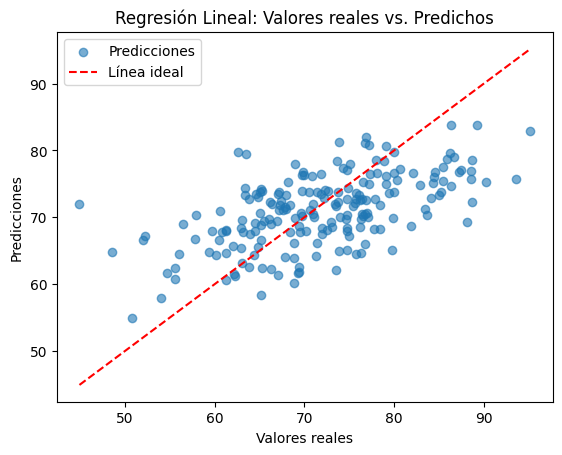

In [9]:
# Graficar valores reales vs. predichos
plt.scatter(y_test, y_pred, label="Predicciones", alpha=0.6)

# Agregar línea de referencia (y = x)
min_val = min(y_test.min(), y_pred.min())  # Valor mínimo entre reales y predichos
max_val = max(y_test.max(), y_pred.max())  # Valor máximo entre reales y predichos
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Línea ideal")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predichos")
plt.legend()
plt.show()

### Comparación de distribuciones

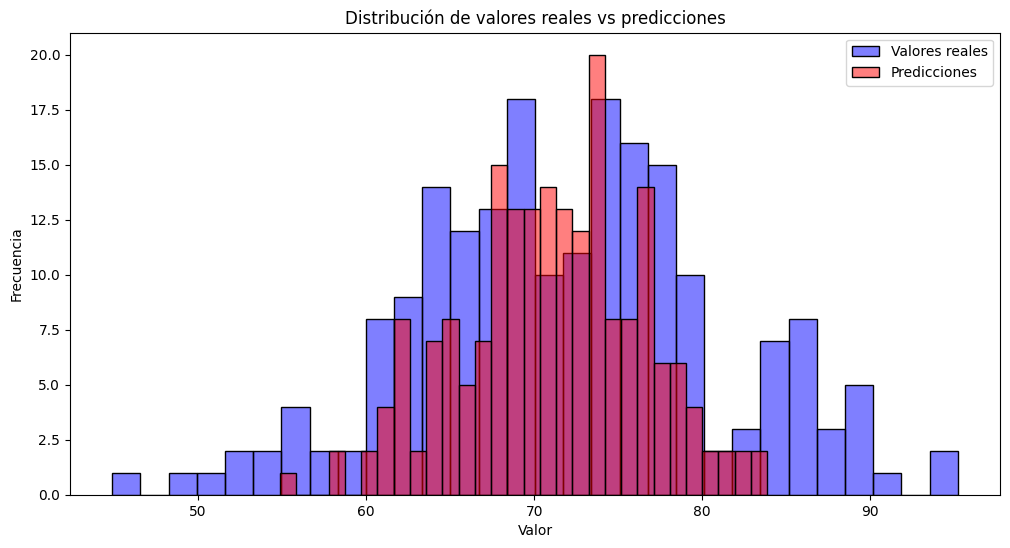

In [10]:
# Graficar valores reales vs. predichos
plt.figure(figsize=(12, 6))

n_bins = 30

# Histograma de y_test (azul)
sns.histplot(y_test, bins=n_bins, edgecolor='black', color='blue', alpha=0.5, label='Valores reales')

# Histograma de y_pred (rojo)
sns.histplot(y_pred, bins=n_bins, edgecolor='black', color='red', alpha=0.5, label='Predicciones')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs predicciones')
plt.legend()
plt.show()

### Residuos

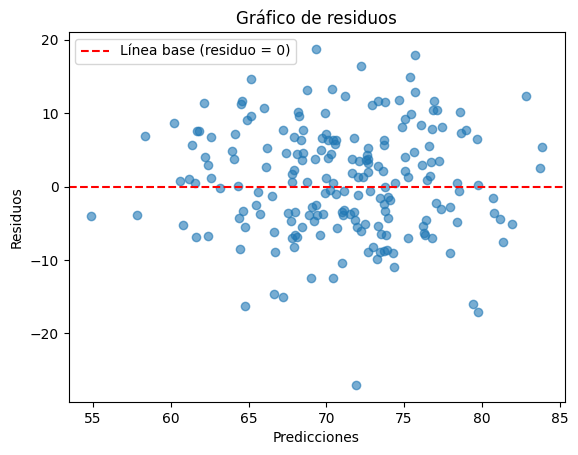

In [11]:
# Calcular los residuos
residuos = y_test - y_pred

# Graficar residuos
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", label="Línea base (residuo = 0)")

# Etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.legend()
plt.show()

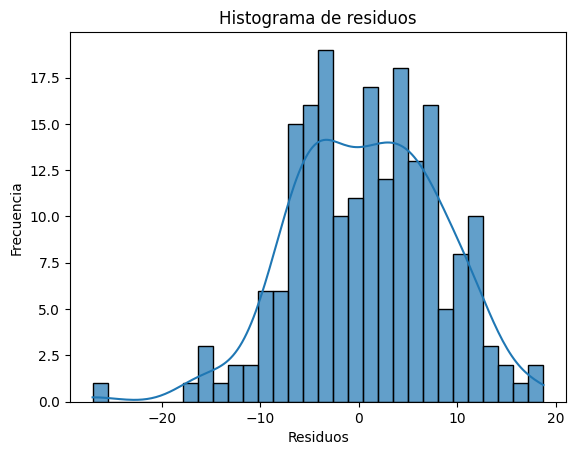

In [12]:
# Graficar histograma de los residuos
sns.histplot(residuos, bins=30, kde=True, edgecolor="black", alpha=0.7)

# Etiquetas y título
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos")

# Mostrar gráfico
plt.show()

---

## Importancia de características

In [13]:
# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': modelo.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs)  # Ordenar por magnitud

In [14]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
8,estilo_aprendizaje_missing,2.824699
9,tiene_tutor_No,-2.156401
10,tiene_tutor_Sí,2.156401
7,horario_estudio_preferido_missing,1.387926
4,nivel_dificultad,1.035447
6,estilo_aprendizaje,0.914036
0,nota_anterior,0.236447
5,horario_estudio_preferido,-0.141337
1,tasa_asistencia,0.102184
2,horas_sueno,-0.015961


In [15]:
#coef_df.[]plot(kind='barh', x='Feature', y='Coefficient', figsize=(10, 6), color='skyblue')

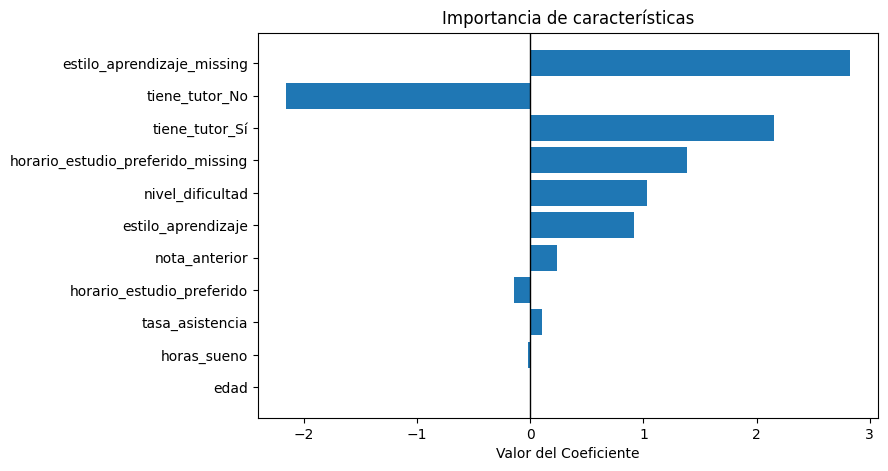

In [16]:
# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Valor del Coeficiente")
plt.title("Importancia de características")
plt.axvline(0, color='black', linewidth=1)  # Línea en el 0 para referencia
plt.show()

## Métricas

In [17]:
# Predicciones
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [18]:
# Cálculo de métricas
metrics = {
    "train": {
        "R2": r2_score(y_train, y_train_pred),
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    },
    "test": {
        "R2": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    },
}

# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics).T

In [19]:
df_metrics.round(2)

,R2,MAE,RMSE
train,0.32,6.41,7.97
test,0.33,6.04,7.41


## Entrenamiento final

In [20]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
model_final = LinearRegression()
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, "../Modelo/modelo_regresion.pkl")

['../Modelo/modelo_regresion.pkl']

# Optimización del modelo
Overfitting - Underfitting

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Definir modelos con regularización
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
}

# Inicializar diccionario para métricas
metrics_results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas
    metrics_results[name] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    }

# Convertir métricas a DataFrame
df_metrics = pd.DataFrame(metrics_results).T


In [22]:
df_metrics.round(2)

,Train R²,Train MAE,Train RMSE,Test R²,Test MAE,Test RMSE
Linear,0.32,6.41,7.97,0.33,6.04,7.41
Ridge,0.32,6.41,7.97,0.33,6.04,7.41
Lasso,0.32,6.42,8.00,0.34,5.98,7.36
ElasticNet,0.32,6.42,8.00,0.34,5.99,7.37
